In [1]:
%matplotlib inline

In [35]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
img_test = Image.open("deep_scores/pix_annotations_png/lg-9997209-aug-beethoven--page-1.png")

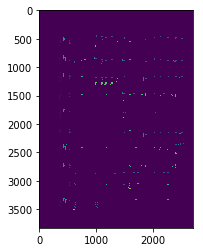

In [4]:
img = np.array(img_test)
plt.imshow(img)

In [5]:
print(img_test.getdata())

In [7]:
"""
29,noteheadBlack
30,noteheadBlackSmall
31,noteheadHalf
32,noteheadHalfSmall
33,noteheadWhole
34,noteheadWholeSmall
35,noteheadDoubleWhole
36,noteheadDoubleWholeSmall
"""

noteheadBlack = 29
noteheadBlackSmall = 30
noteheadHalf = 31
noteheadHalfSmall = 32
noteheadWhole = 33
noteheadWholeSmall = 34
noteheadDoubleWhole = 35
noteheadDoubleWholeSmall = 36

In [12]:
numBlack = 0
numBlackSmall = 0
numHalf = 0
numHalfSmall = 0
numWhole = 0
numWholeSmall = 0
numDoubleWhole = 0
numDoubleWholeSmall = 0

In [13]:
for pixel in img_test.getdata():
    if pixel == noteheadBlack:
        numBlack += 1
    elif pixel == noteheadBlackSmall:
        numBlackSmall += 1
    elif pixel == noteheadHalf:
        numHalf += 1
    elif pixel == noteheadHalfSmall:
        numHalfSmall += 1
    elif pixel == noteheadWhole:
        numWhole += 1
    elif pixel == noteheadWholeSmall:
        numWholeSmall += 1
    elif pixel == noteheadDoubleWhole:
        numDoubleWhole += 1
    elif pixel == noteheadDoubleWholeSmall:
        numDoubleWholeSmall += 1

In [16]:
print("number of black note pixels: " + str(numBlack))
print("number of small black note pixels: " + str(numBlackSmall))
print("number of half note pixels: " + str(numHalf))
print("number of small half note pixels: " + str(numHalfSmall))
print("number of whole note pixels: " + str(numWhole))
print("number of small whole note pixels: " + str(numWholeSmall))
print("number of double whole note pixels: " + str(numDoubleWhole))
print("number of small double whole note pixels: " + str(numDoubleWholeSmall))

number of black note pixels: 30736
number of small black note pixels: 0
number of half note pixels: 407
number of small half note pixels: 0
number of whole note pixels: 5272
number of small whole note pixels: 0
number of double whole note pixels: 0
number of small double whole note pixels: 0


In [22]:
imgpix = [numBlack, numBlackSmall, numHalf, numHalfSmall, numWhole, numWholeSmall, numDoubleWhole, numDoubleWholeSmall]

In [17]:
img_2 = Image.open("deep_scores/pix_annotations_png/lg-99849559-aug-beethoven--page-5.png")

In [18]:
numBlack2 = 0
numBlackSmall2 = 0
numHalf2 = 0
numHalfSmall2 = 0
numWhole2 = 0
numWholeSmall2 = 0
numDoubleWhole2 = 0
numDoubleWholeSmall2 = 0

In [19]:
for pixel in img_2.getdata():
    if pixel == noteheadBlack:
        numBlack2 += 1
    elif pixel == noteheadBlackSmall:
        numBlackSmall2 += 1
    elif pixel == noteheadHalf:
        numHalf2 += 1
    elif pixel == noteheadHalfSmall:
        numHalfSmall2 += 1
    elif pixel == noteheadWhole:
        numWhole2 += 1
    elif pixel == noteheadWholeSmall:
        numWholeSmall2 += 1
    elif pixel == noteheadDoubleWhole:
        numDoubleWhole2 += 1
    elif pixel == noteheadDoubleWholeSmall:
        numDoubleWholeSmall2 += 1

In [20]:
print("number of black note pixels: " + str(numBlack2))
print("number of small black note pixels: " + str(numBlackSmall2))
print("number of half note pixels: " + str(numHalf2))
print("number of small half note pixels: " + str(numHalfSmall2))
print("number of whole note pixels: " + str(numWhole2))
print("number of small whole note pixels: " + str(numWholeSmall2))
print("number of double whole note pixels: " + str(numDoubleWhole2))
print("number of small double whole note pixels: " + str(numDoubleWholeSmall2))

number of black note pixels: 32897
number of small black note pixels: 0
number of half note pixels: 3599
number of small half note pixels: 0
number of whole note pixels: 0
number of small whole note pixels: 0
number of double whole note pixels: 0
number of small double whole note pixels: 0


In [21]:
img2pix = [numBlack2, numBlackSmall2, numHalf2, numHalfSmall2, numWhole2, numWholeSmall2, numDoubleWhole2, numDoubleWholeSmall2]

In [23]:
def createNoteValueDict():
    noteValues = {}
    noteValues["noteheadBlack"] = 29
    noteValues["noteheadBlackSmall"] = 30
    noteValues["noteheadHalf"] = 31
    noteValues["noteheadHalfSmall"] = 32
    noteValues["noteheadWhole"] = 33
    noteValues["noteheadWholeSmall"] = 34
    noteValues["noteheadDoubleWhole"] = 35
    noteValues["noteheadDoubleWholeSmall"] = 36
    return noteValues

In [29]:
def getNotes(image):
    valueDict = createNoteValueDict()
    img = Image.open(image)
    
    #create dict of values for image and set to 0
    imageValues = valueDict
    for key in imageValues.keys():
        imageValues[key] = 0
    
    for pixel in img.getdata():
        if pixel == noteheadBlack:
            imageValues["noteheadBlack"] += 1
        elif pixel == noteheadBlackSmall:
            imageValues["noteheadBlackSmall"] += 1
        elif pixel == noteheadHalf:
            imageValues["noteheadHalf"] += 1
        elif pixel == noteheadHalfSmall:
            imageValues["noteheadHalfSmall"] += 1
        elif pixel == noteheadWhole:
            imageValues["noteheadWhole"] += 1
        elif pixel == noteheadWholeSmall:
            imageValues["noteheadWholeSmall"] += 1
        elif pixel == noteheadDoubleWhole:
            imageValues["noteheadDoubleWhole"] += 1
        elif pixel == noteheadDoubleWholeSmall:
            imageValues["noteheadDoubleWholeSmall"] += 1
            
    return imageValues

In [38]:
def naiveDistance(img_1, img_2):
    totalDist = 0
    img1_values = getNotes(img_1)
    img2_values = getNotes(img_2)
    
    for key in img1_values.keys():
        totalDist += (img1_values[key] - img2_values[key])
        
    totalDist = abs(totalDist)
        
    print("total distance between images 1 and 2: " + str(totalDist))

In [31]:
img1 = "deep_scores/pix_annotations_png/lg-9997209-aug-beethoven--page-1.png"
img2 = "deep_scores/pix_annotations_png/lg-99849559-aug-beethoven--page-5.png"

In [39]:
naiveDistance(img1,img2)

total distance between images 1 and 2: 81


In [40]:
naiveDistance(img1,img1)

total distance between images 1 and 2: 0


In [41]:
naiveDistance(img2,img2)

total distance between images 1 and 2: 0
